In [33]:
# Import semua Library yang diperlukan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [34]:
# Membaca dataset dan menampil informasi dataset
train = pd.read_csv("training_dataset.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22916 entries, 0 to 22915
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_number               22916 non-null  int64  
 1   usia                          22916 non-null  int64  
 2   pekerjaan                     22916 non-null  object 
 3   status_perkawinan             22916 non-null  object 
 4   pendidikan                    22916 non-null  object 
 5   gagal_bayar_sebelumnya        22916 non-null  object 
 6   pinjaman_rumah                22916 non-null  object 
 7   pinjaman_pribadi              22916 non-null  object 
 8   jenis_kontak                  22916 non-null  object 
 9   bulan_kontak_terakhir         22916 non-null  object 
 10  hari_kontak_terakhir          22916 non-null  object 
 11  jumlah_kontak_kampanye_ini    22916 non-null  int64  
 12  hari_sejak_kontak_sebelumnya  22916 non-null  int64  
 13  j

In [35]:
# Menampilan Stratisti Deskkriptif Dataset
train.describe()

,customer_number,usia,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,berlangganan_deposito
count,22916.000000,22916.000000,22916.000000,22916.000000,22916.000000,22916.000000,22916.000000,22916.000000,22916.000000,22916.000000,22916.000000
mean,550930.993193,40.016233,2.561878,962.210377,0.170143,0.077915,93.576541,-40.485717,3.617890,5166.773124,0.114069
std,259909.889175,10.438059,2.794178,187.566774,0.490611,1.576176,0.580586,4.641091,1.737591,72.479698,0.317902
min,100108.000000,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,325755.000000,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,553139.000000,38.000000,2.000000,999.000000,0.000000,1.100000,93.876000,-41.800000,4.857000,5191.000000,0.000000
75%,777157.500000,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,999997.000000,98.000000,42.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [36]:
# Cek missing values
print("\nMissing Values per Fitur: ")
print(train.isnull().sum())


Missing Values per Fitur: 
customer_number                 0
usia                            0
pekerjaan                       0
status_perkawinan               0
pendidikan                      0
gagal_bayar_sebelumnya          0
pinjaman_rumah                  0
pinjaman_pribadi                0
jenis_kontak                    0
bulan_kontak_terakhir           0
hari_kontak_terakhir            0
jumlah_kontak_kampanye_ini      0
hari_sejak_kontak_sebelumnya    0
jumlah_kontak_sebelumnya        0
hasil_kampanye_sebelumnya       0
tingkat_variasi_pekerjaan       0
indeks_harga_konsumen           0
indeks_kepercayaan_konsumen     0
suku_bunga_euribor_3bln         0
jumlah_pekerja                  0
pulau                           0
berlangganan_deposito           0
dtype: int64


Dalam dataset ini tidak terdapat missing value pada setiap variabel

Selanjutnya, menghapus kolom tidak relevan untuk analisis lebih lanjut,'customer_number', pinjaman_rumah', pinjaman_pribadi', 'pulau

In [37]:
# Hapus Kolom 'customer_number','pinjaman_rumah','pinjaman_pribadi', 'pulau'
train = train.drop(columns=['pinjaman_rumah','pinjaman_pribadi', 'pulau'])

# Tmapilkan DataFrame untuk memastikan kolom telah dihapus
train.head()

,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,jenis_kontak,bulan_kontak_terakhir,hari_kontak_terakhir,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,berlangganan_deposito
0,531036,63,sosial media specialis,menikah,Pendidikan Tinggi,no,cellular,jul,fri,2,999,0,nonexistent,-1.7,94.215,-40.3,0.885,4991.6,1
1,999241,43,teknisi,menikah,Pendidikan Tinggi,no,cellular,nov,fri,2,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,995002,29,sosial media specialis,lajang,Pendidikan Tinggi,no,cellular,jul,thu,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0
3,932750,40,pekerja kasar,menikah,SMA,no,telephone,may,wed,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,1
4,684699,40,sosial media specialis,lajang,Pendidikan Tinggi,no,cellular,aug,wed,3,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0


## EXploratory Data Analysis (EDA)

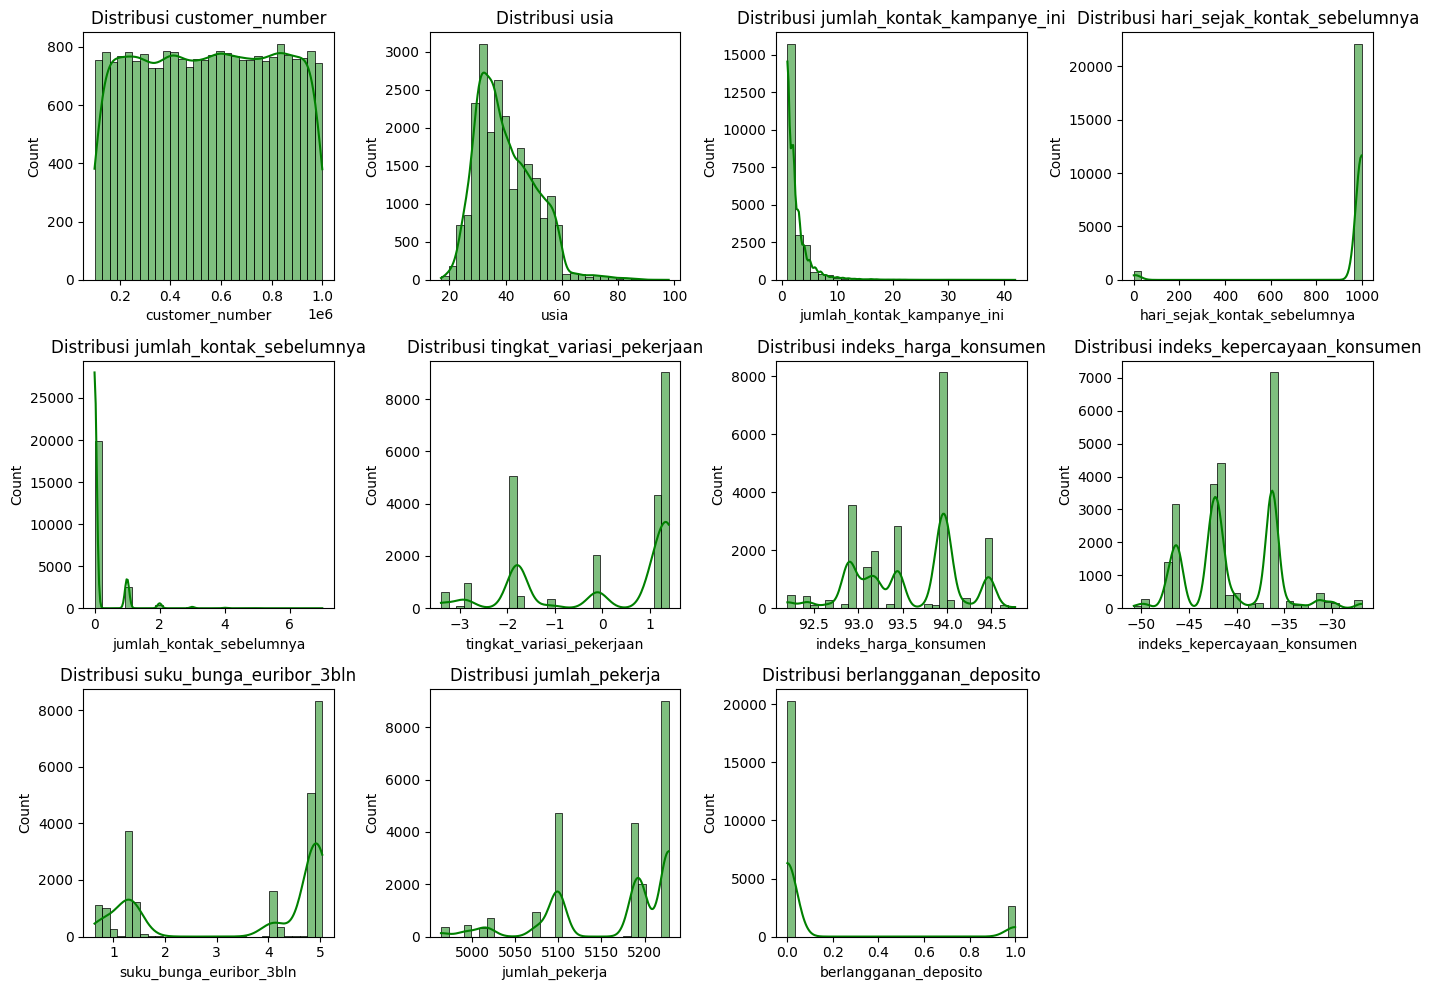

In [38]:
# Ditribusi fitur numerik
num_features = train.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(train[column], bins=30, kde=True, color='green')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

<ipython-input-39-d65ba20946b7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=train[column], palette='viridis')
<ipython-input-39-d65ba20946b7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=train[column], palette='viridis')
<ipython-input-39-d65ba20946b7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=train[column], palette='viridis')
<ipython-input-39-d65ba20946b7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=F

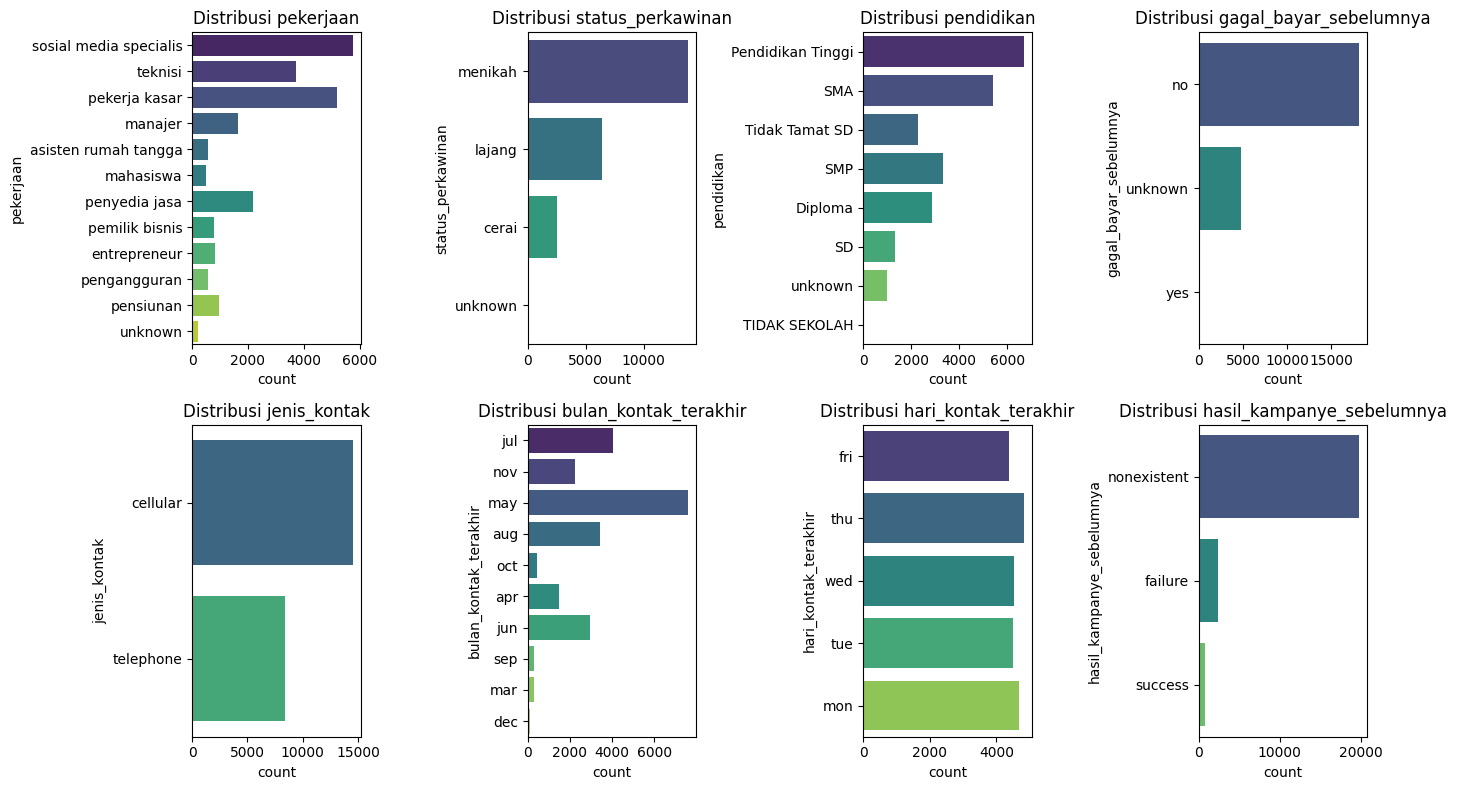

In [39]:
# Distribusi fitur kategorikal
cat_features = train.select_dtypes(include=['object'])
plt.figure(figsize=(14, 8))
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(2, 4, i)
    sns.countplot(y=train[column], palette='viridis')
    plt.title(f'Distribusi {column}')

plt.tight_layout()
plt.show()

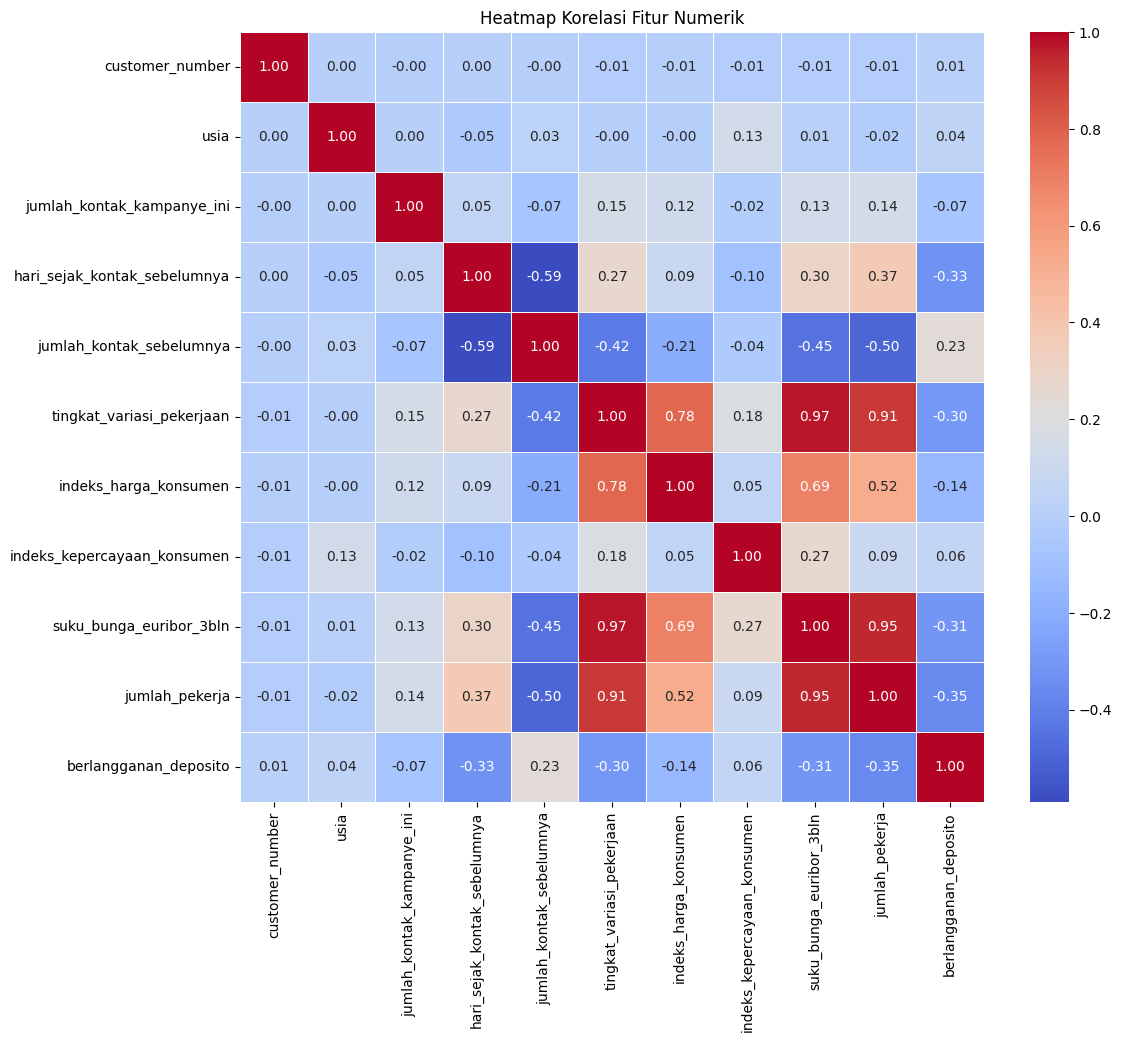

In [40]:
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

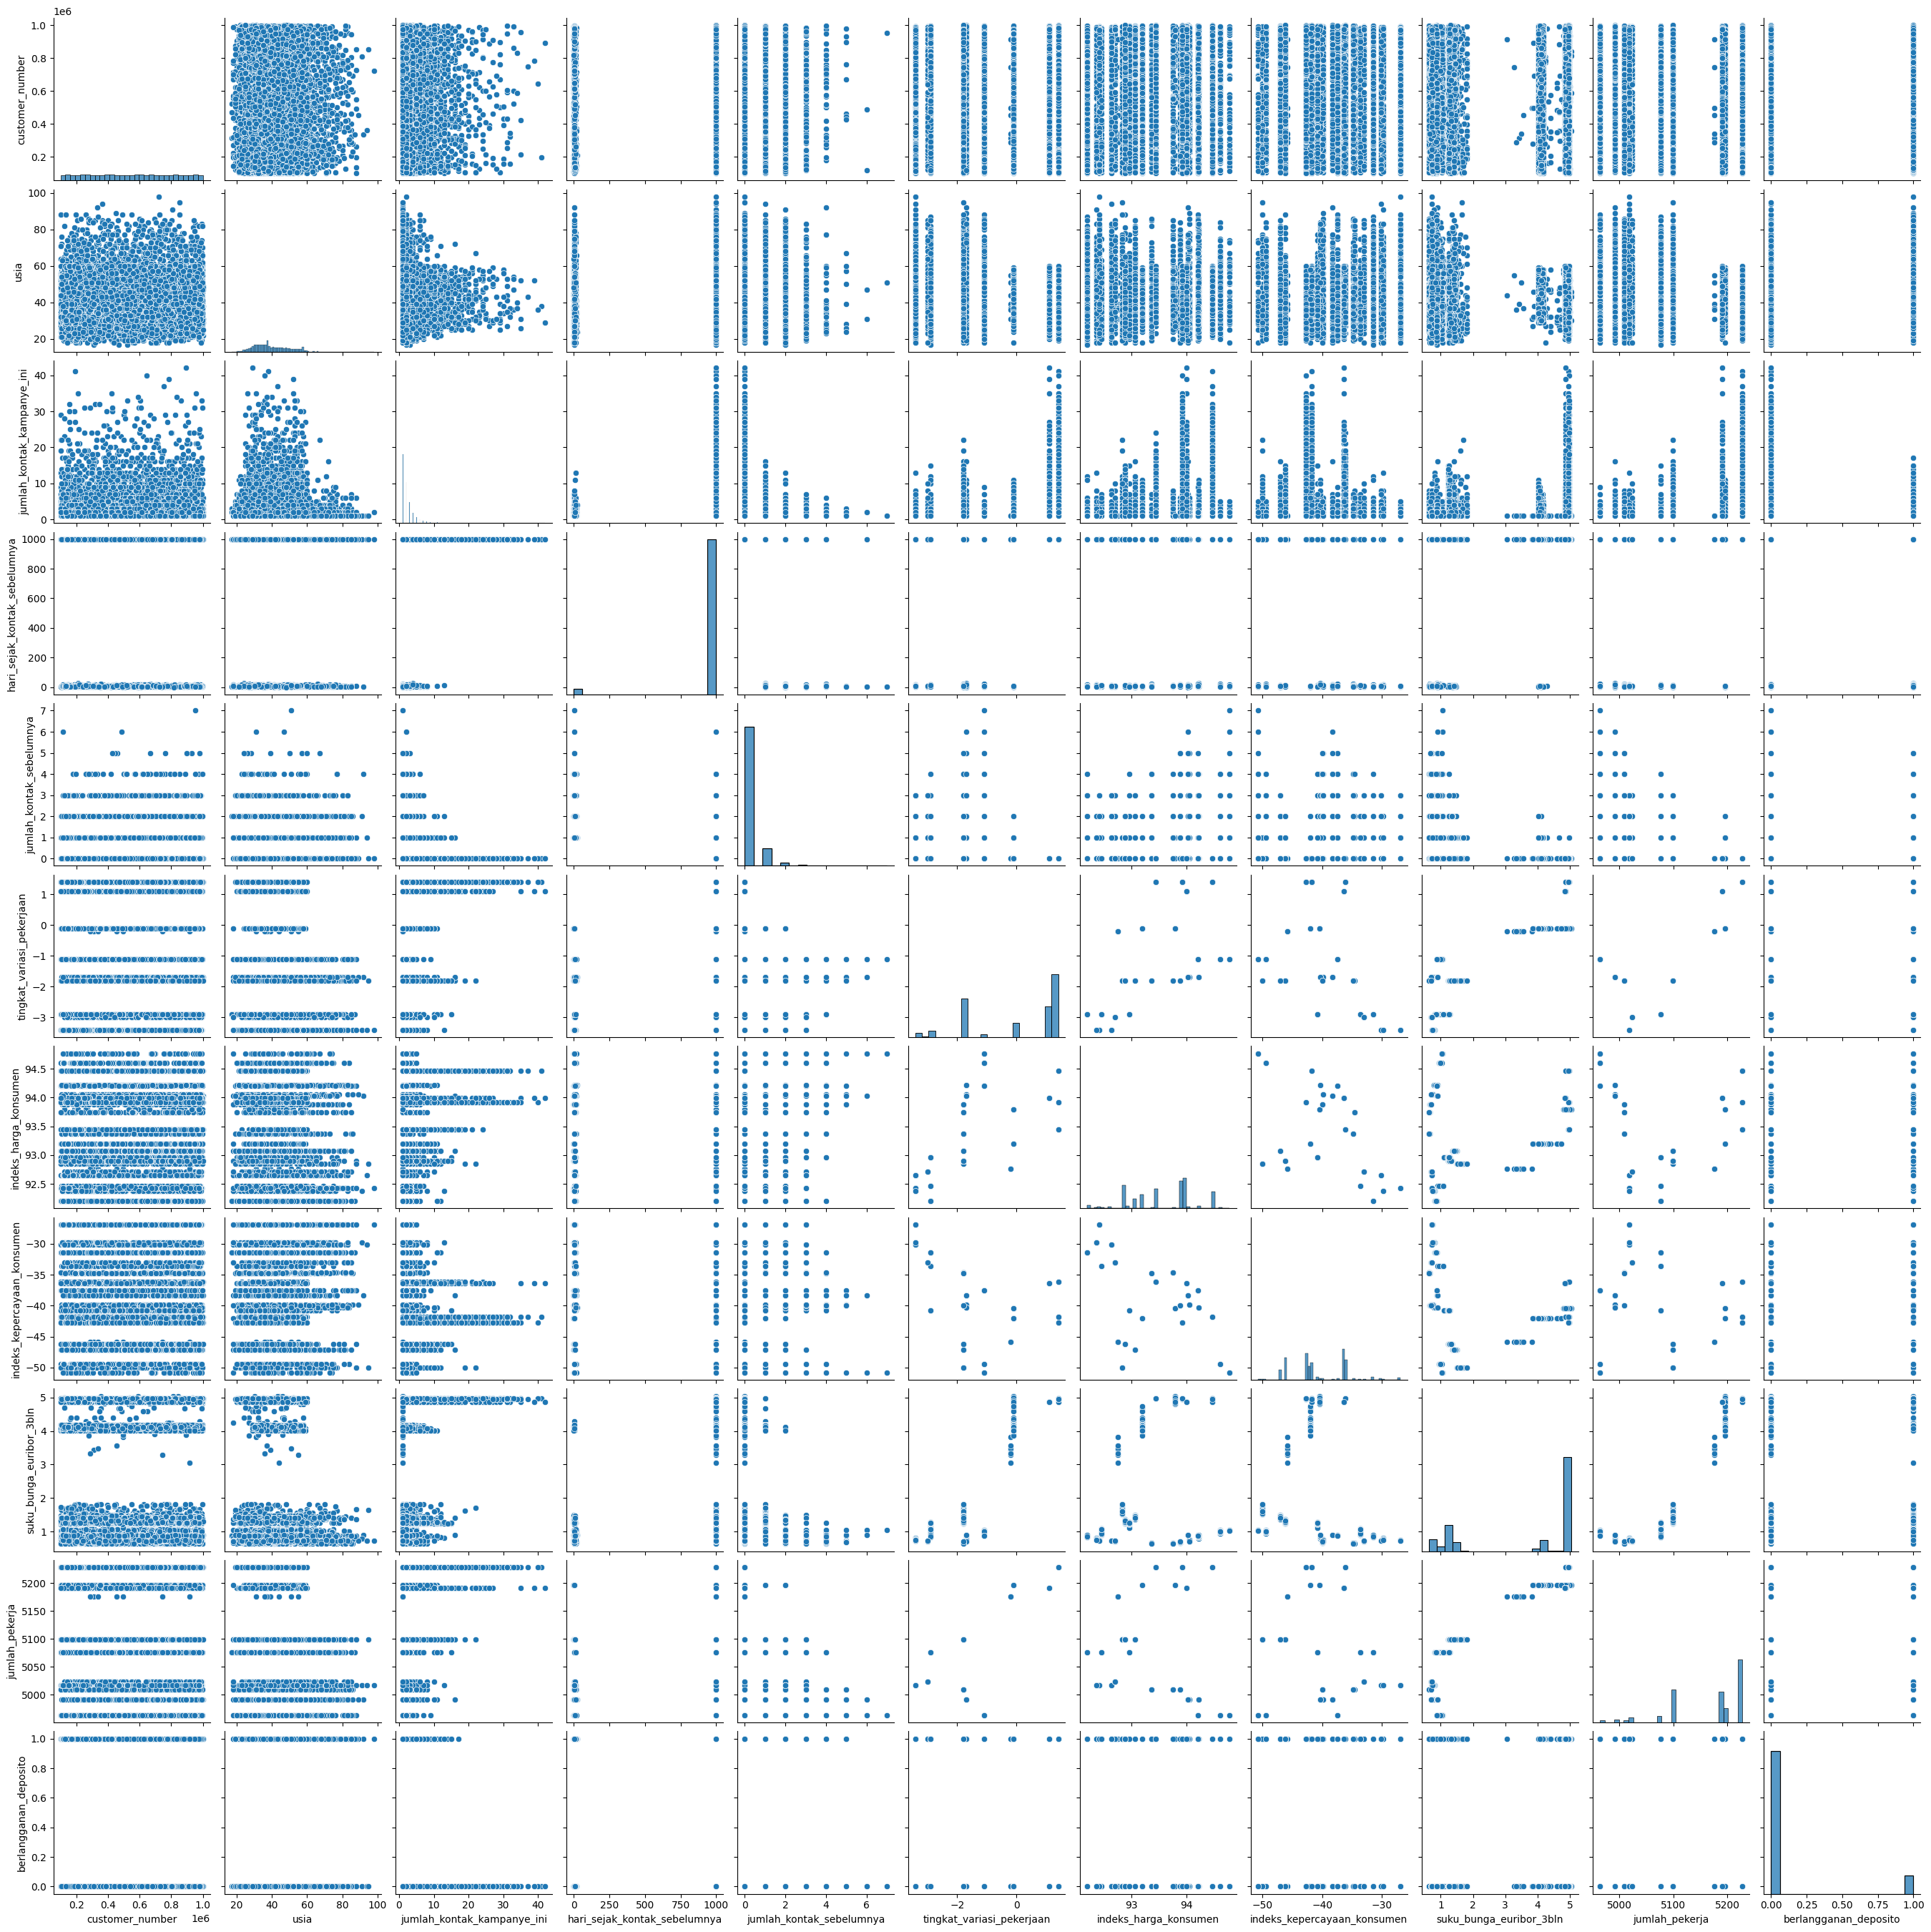

In [41]:
# Pairplot untu fitur numerik
sns.pairplot(num_features)
plt.show()

<ipython-input-42-3ee3ff7d5744>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='berlangganan_deposito', data=train, palette='viridis')


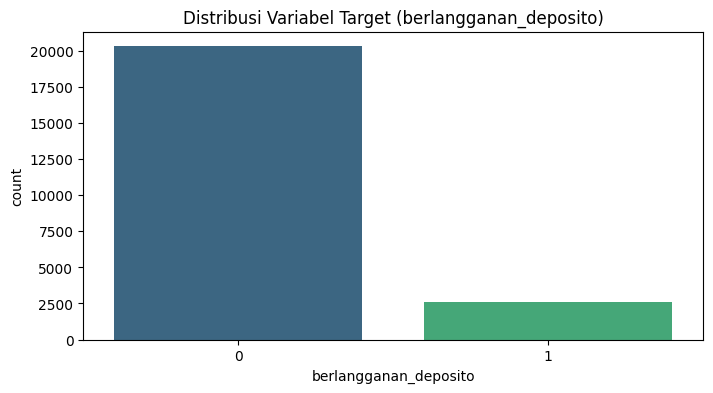

In [42]:
# Visualisasi distribusi variabel target
plt.figure(figsize=(8, 4))
sns.countplot(x='berlangganan_deposito', data=train, palette='viridis')
plt.title('Distribusi Variabel Target (berlangganan_deposito)')
plt.show()

menampilkan visualisasi distribusi dari variabel target 'berlangganan_deposito' menggunakan plot hitung (count plot).

Melakukan encoding pada fitur kategorikal.
 *LabelEncoder* digunakan untuk mengonversi nilai kategorikal menjadi format numerik yang dapat diproses oleh model.

In [43]:
# Buat instance LabelEncoder
label_encoder = LabelEncoder()

# List kolom kategorikal yang perlu di encode
categorical_columns = ['hasil_kampanye_sebelumnya',
                      'bulan_kontak_terakhir',
                      'hari_kontak_terakhir',
                      'pekerjaan',
                      'jenis_kontak',
                      'gagal_bayar_sebelumnya',
                      'status_perkawinan',
                      'pendidikan']

# Encode kolom kategorikal
for column in categorical_columns:
    train[column] = label_encoder.fit_transform(train[column])

# Tampilkan DataFrame untuk memastikan encoding telah diterapkan
train.head()


,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,jenis_kontak,bulan_kontak_terakhir,hari_kontak_terakhir,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,berlangganan_deposito
0,531036,63,9,2,1,0,0,3,0,2,999,0,1,-1.7,94.215,-40.3,0.885,4991.6,1
1,999241,43,10,2,1,0,0,7,0,2,999,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,995002,29,9,1,1,0,0,3,2,1,999,0,1,1.4,93.918,-42.7,4.958,5228.1,0
3,932750,40,4,2,3,0,1,6,4,2,999,0,1,1.1,93.994,-36.4,4.859,5191.0,1
4,684699,40,9,1,1,0,0,1,4,3,999,0,1,1.4,93.444,-36.1,4.964,5228.1,0


### Data Splitting

data numerik dinormalisasi menggunakan *MinMaxScaler* untuk memastikan bahwa semua fitur numerik berada dalam rentang yang sama, yang dapat meningkatkan performa model

Data kemudian dipisahkan menjadi set pelatihan dan set uji menggunakan *train_test_split* dengan 20% data digunakan untuk uji dan 80% untuk pelatihan.

In [44]:
# Buat instance MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi semua kolom numerik
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns
train[numeric_columns] = scaler.fit_transform(train[numeric_columns])

# Pisahkan fitur(X) dan  target (y)
X = train.drop(columns=['berlangganan_deposito'])
y = train['berlangganan_deposito']

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape :X_train={X_train.shape}, y_train={y_train.shape}] ")
print(f"Test set shape : X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape :X_train=(18332, 18), y_train=(18332,)] 
Test set shape : X_test=(4584, 18), y_test=(4584,)


Melatih model dengan KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, SVC, dan GaussianNB.

In [45]:
# Pelatihan Model
# Definisikan setiap Klasifikasi secara terpisah
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC(probability=True).fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


Pada langkah ini, setiap model dievaluasi untuk mengukur kinerjanya. Fungsi *evaluate_model* digunakan untuk menghitung berbagai metrik performa, seperti matriks kebingungannya (confusion matrix), serta skor akurasi, presisi, recall, dan F1-Score.

In [46]:
# fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kamus
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm= confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'True Negative (TN)': tn,
        'False Negative (FN)': fn,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }
    return results

# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes': evaluate_model(nb, X_test, y_test)
}

# Buat DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame
summary_df

,Model,Accuracy,Precision,Recall,F1-Score
0,K-Nearest Neighbors (KNN),0.891798,0.544170,0.295585,0.383085
1,Decision Tree,0.834860,0.300676,0.341651,0.319856
2,Random Forest (RF),0.897469,0.602410,0.287908,0.389610
3,Support Vector Machine (SVM),0.898342,0.641026,0.239923,0.349162
4,Naive Bayes,0.832461,0.343473,0.520154,0.413740


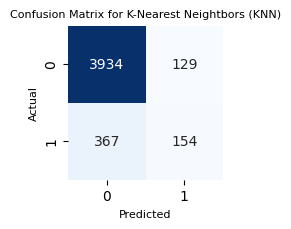

In [47]:
# Membuat fungsi untuk menampilkan Confusion Matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(2, 2))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}', fontsize=8)
    plt.ylabel('Actual', fontsize=8)
    plt.xlabel('Predicted', fontsize=8)
    plt.show()

# Tampilkan Confusion Matrix untuk KNN
knn_cm = results['K-Nearest Neighbors (KNN)']['Confusion Matrix']
plot_confusion_matrix(knn_cm, 'K-Nearest Neightbors (KNN)')

- True Positive (TP) = 149: Model berhasil mengidentifikasi 149 nasabah yang benar-benar membeli deposito dengan tepat.

- False Positive (FP) = 135: Model salah mengidentifikasi 135 nasabah yang sebenarnya tidak membeli deposito sebagai pembeli deposito.

- True Negative (TN) = 3928: Model benar mengidentifikasi nasabah yang tidak membeli deposito.

- False Negative (FN) = 372: Model gagal mengidentifikasi 372 nasabah yang sebenarnya membeli deposito.

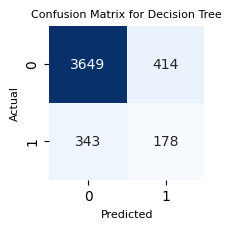

In [48]:
# Tampilkan Confusion Matrix untuk Decision Tree
dt_cm = results['Decision Tree']['Confusion Matrix']
plot_confusion_matrix(dt_cm, 'Decision Tree')

- True Positive (TP) = 159: Model mengidentifikasi 159 nasabah yang benar-benar membeli deposito.

- False Positive (FP) = 421: Model salah mengidentifikasi 421 nasabah yang tidak membeli deposito sebagai pembeli deposito.

- True Negative (TN) = 3642: Model mengidentifikasi dengan benar nasabah yang tidak membeli deposito.

- False Negative (FN) = 362: Model gagal mengidentifikasi 362 nasabah yang sebenarnya membeli deposito.

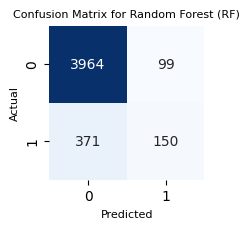

In [49]:
# Tampilkan Confusion Matrix untuk Random Forest
rf_cm = results['Random Forest (RF)']['Confusion Matrix']
plot_confusion_matrix(rf_cm, 'Random Forest (RF)')

- True Positive (TP) = 154: Model berhasil mengidentifikasi 154 nasabah yang benar-benar membeli deposito.

- False Positive (FP) = 142: Model salah mengidentifikasi 142 nasabah yang sebenarnya tidak membeli deposito sebagai pembeli deposito.

- True Negative (TN) = 3921: Model benar mengidentifikasi nasabah yang tidak membeli deposito.

- False Negative (FN) = 367: Model gagal mengidentifikasi 367 nasabah yang sebenarnya membeli deposito.

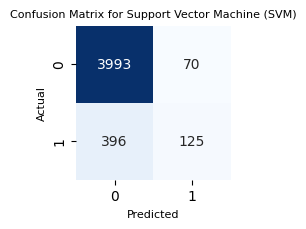

In [50]:
# Tampilkan Confusion Matrix untuk SVM
svm_cm = results['Support Vector Machine (SVM)']['Confusion Matrix']
plot_confusion_matrix(svm_cm, 'Support Vector Machine (SVM)')

- True Positive (TP) = 128: Model mengenali 128 nasabah yang benar membeli deposito.

- False Positive (FP) = 66: Model hanya salah mengidentifikasi 66 nasabah yang tidak membeli deposito sebagai pembeli.

- True Negative (TN) = 3997: Model sangat baik dalam mengidentifikasi nasabah yang tidak membeli deposito.

- False Negative (FN) = 393: Model gagal mengidentifikasi 393 nasabah yang sebenarnya membeli deposito.

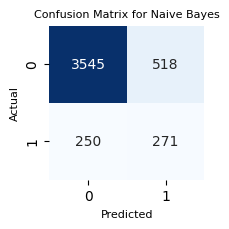

In [51]:
# Tampilkan Confusion Matrix untuk Naive Bayes
nb_cm = results['Naive Bayes']['Confusion Matrix']
plot_confusion_matrix(nb_cm, 'Naive Bayes')

- True Positive (TP) = 270: Model mengenali 270 nasabah yang benar membeli deposito.

- False Positive (FP) = 518: Model salah mengidentifikasi 518 nasabah yang tidak membeli deposito sebagai pembeli.

- True Negative (TN) = 3545: Model mengidentifikasi 3545 nasabah yang tidak membeli deposito.

- False Negative (FN) = 251: Model gagal mengidentifikasi 251 nasabah yang sebenarnya membeli deposito.

In [32]:
import joblib  # Untuk scikit-learn model
# Pilih model yang ingin disimpan, misalnya Random Forest (rf)
model_to_save = svm

# Tentukan nama file untuk menyimpan model
filename = 'svm_model.joblib'

# Simpan model menggunakan joblib.dump()
joblib.dump(model_to_save, filename)

print(f"Model {type(model_to_save).__name__} berhasil disimpan sebagai {filename}")

Model SVC berhasil disimpan sebagai svm_model.joblib
